<a href="https://colab.research.google.com/github/aditi2212-bot/work/blob/main/Project_1_Phising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/akashkr/phishing-website-dataset
License(s): CC0-1.0
phishing-website-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  phishing-website-dataset.zip
  inflating: phishing_data/dataset.csv  
Dataset shape: (11055, 32)
After cleaning: (11055, 32)


/tmp/ipython-input-1136575673.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Result", data=df, palette="Set2")


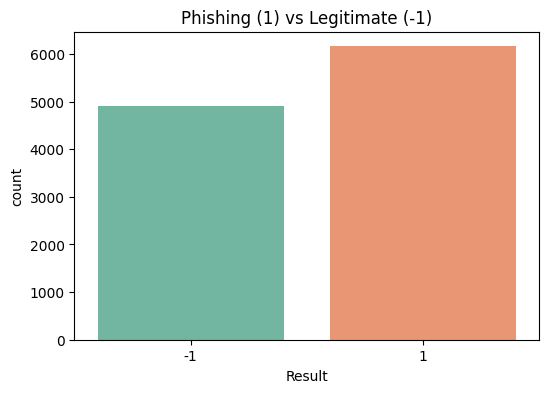

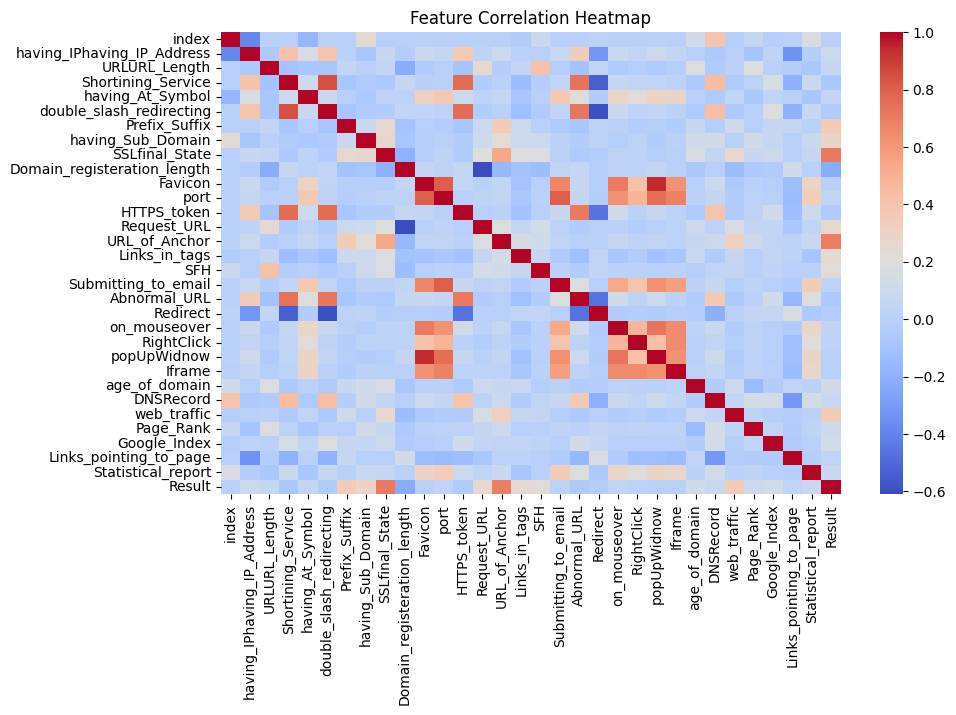

              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



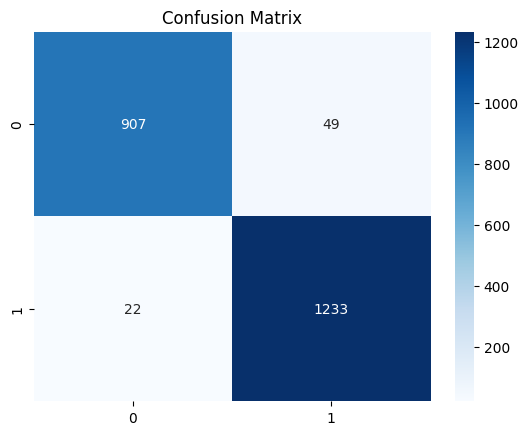

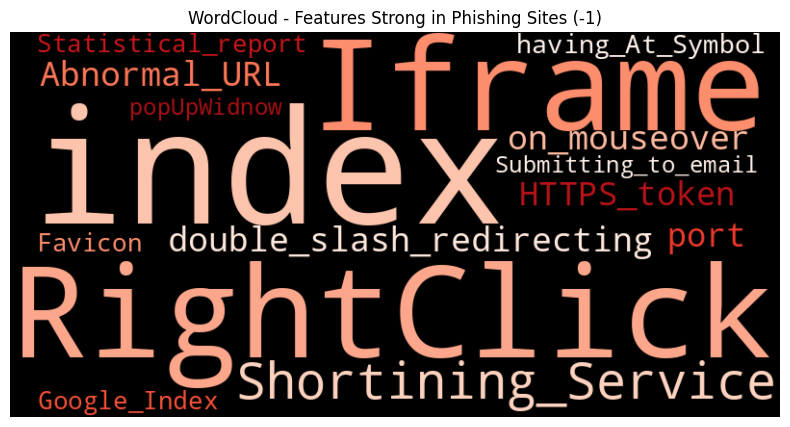

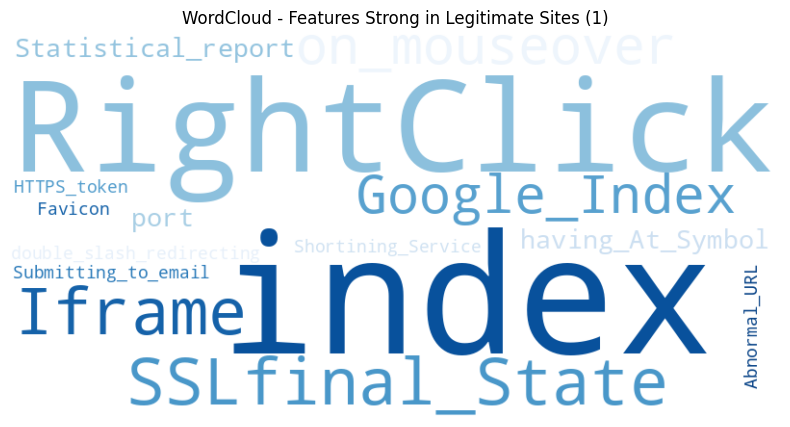

/tmp/ipython-input-1136575673.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=X.columns[indices][:15], palette="viridis")


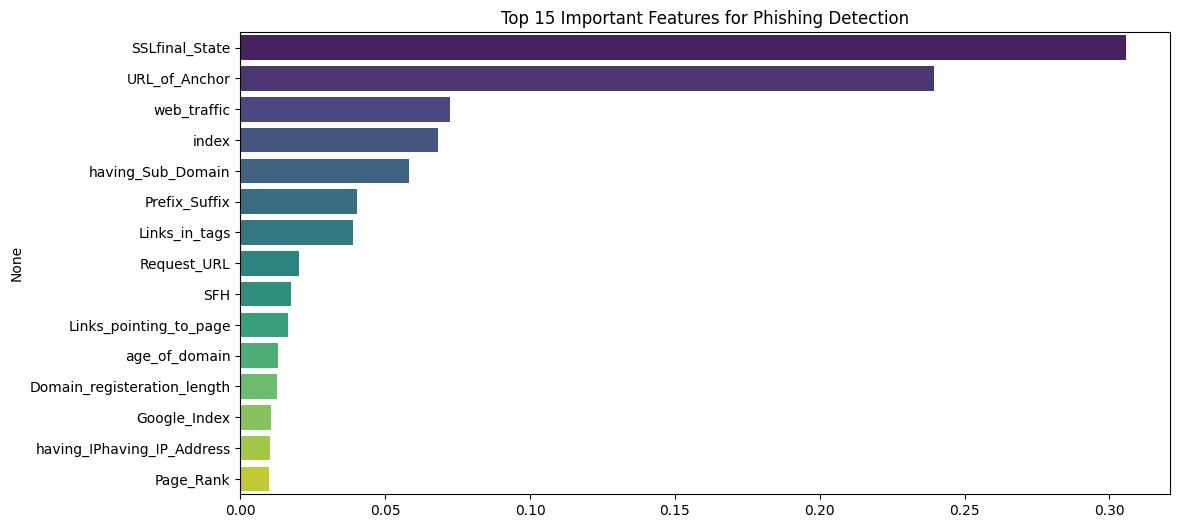

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:09:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.923      0.928   0.938     0.933
1        Random Forest     0.968      0.962   0.982     0.972
2              XGBoost     0.966      0.962   0.978     0.970


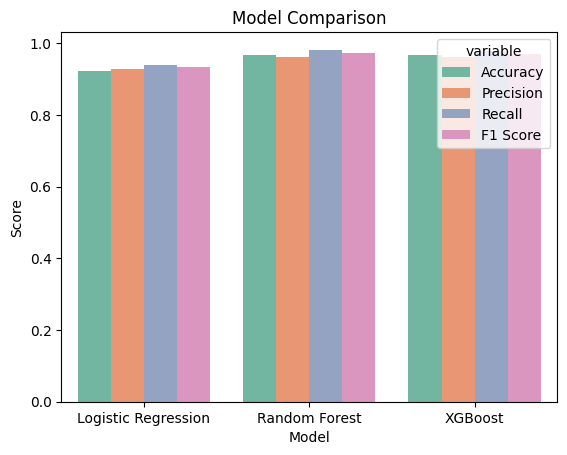

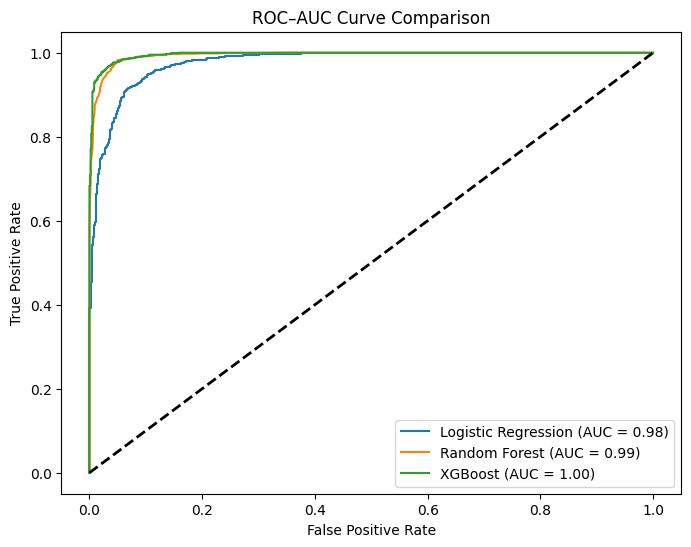

Model Performance Ranking:
                 Model  Accuracy  Precision  Recall  F1 Score  Rank
1        Random Forest     0.968      0.962   0.982     0.972     1
2              XGBoost     0.966      0.962   0.978     0.970     1
0  Logistic Regression     0.923      0.928   0.938     0.933     1


/tmp/ipython-input-1136575673.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")


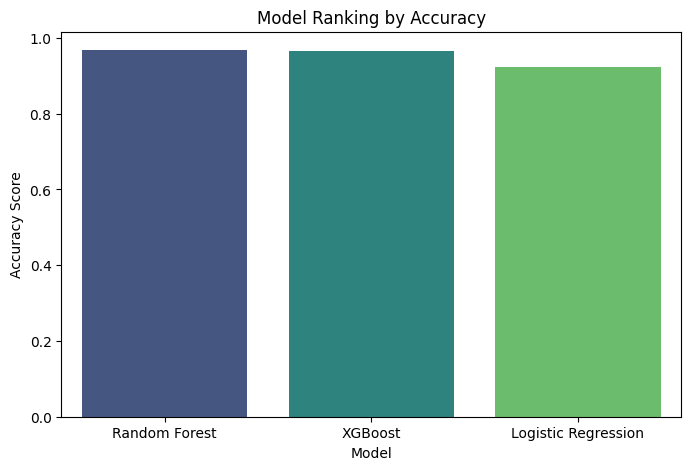

Best model selected for deployment: Random Forest
Model saved as best_phishing_model.pkl
Sample Prediction: Phishing


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# ====================================
# STEP 1: Install required libraries
# ====================================
!pip install kaggle wordcloud xgboost

# ====================================
# STEP 2: Save Kaggle API key
# (replace with your API if needed)
# ====================================
import json
kaggle_api = {"username":"adta2212","key":"d69602a8d7c02c2c1360b1c94721b61c"}
with open("kaggle.json", "w") as f:
    json.dump(kaggle_api, f)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ====================================
# STEP 3: Download + unzip dataset
# ====================================
!kaggle datasets download -d akashkr/phishing-website-dataset
!unzip -o phishing-website-dataset.zip -d phishing_data

# ====================================
# STEP 4: Import Libraries
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# ====================================
# STEP 5: Load Dataset
# ====================================
df = pd.read_csv("phishing_data/dataset.csv")   # file inside unzip
print("Dataset shape:", df.shape)
df.head()

# ====================================
# STEP 6: Data Cleaning
# ====================================
df = df.drop_duplicates()
df = df.dropna()
print("After cleaning:", df.shape)

# ====================================
# STEP 7: Basic Visualization
# ====================================
plt.figure(figsize=(6,4))
sns.countplot(x="Result", data=df, palette="Set2")
plt.title("Phishing (1) vs Legitimate (-1)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ====================================
# STEP 8: Train/Test Split
# ====================================
X = df.drop("Result", axis=1)
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====================================
# STEP 9: Train RandomForest Model
# ====================================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ====================================
# STEP 10: WordCloud (Corrected)
# ====================================
from collections import Counter

# Create "word-like" features for phishing and legitimate sites
phish_features = X[y == -1].mean().sort_values(ascending=False).head(15).index
legit_features = X[y == 1].mean().sort_values(ascending=False).head(15).index

# Convert them to strings for WordCloud
phish_text = " ".join(phish_features)
legit_text = " ".join(legit_features)

# Phishing WordCloud
wordcloud_phish = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(phish_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_phish, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Features Strong in Phishing Sites (-1)")
plt.show()

# Legitimate WordCloud
wordcloud_legit = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(legit_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_legit, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Features Strong in Legitimate Sites (1)")
plt.show()


# ====================================
# STEP 11: Feature Importance
# ====================================
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices][:15], y=X.columns[indices][:15], palette="viridis")
plt.title("Top 15 Important Features for Phishing Detection")
plt.show()

# ====================================
# STEP 12: Model Comparison (Fixed)
# ====================================
from sklearn.preprocessing import StandardScaler

# Scale features for models that need it (like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fix labels for XGBoost (convert -1 to 0)
y_train_fixed = y_train.replace(-1, 0)
y_test_fixed = y_test.replace(-1, 0)

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),  # Increased iterations
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

results = []

for name, clf in models.items():
    if name == "Logistic Regression":
        clf.fit(X_train_scaled, y_train_fixed)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train_fixed)
        y_pred = clf.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test_fixed, y_pred), 3),
        "Precision": round(precision_score(y_test_fixed, y_pred), 3),
        "Recall": round(recall_score(y_test_fixed, y_pred), 3),
        "F1 Score": round(f1_score(y_test_fixed, y_pred), 3)
    })

results_df = pd.DataFrame(results)
print(results_df)

sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable", palette="Set2")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


# ====================================
# STEP 13: ROC–AUC Curve Comparison
# ====================================
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for ROC
y_test_bin = label_binarize(y_test_fixed, classes=[0, 1])

plt.figure(figsize=(8,6))

for name, clf in models.items():
    if name == "Logistic Regression":
        y_proba = clf.predict_proba(X_test_scaled)[:,1]
    else:
        y_proba = clf.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Diagonal line
plt.plot([0,1], [0,1], 'k--', lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# ====================================
# STEP 14: Rank Models (Best → Worst)
# ====================================
# Rank models by Accuracy first, then F1 Score
results_df["Rank"] = results_df.sort_values(
    by=["Accuracy", "F1 Score"], ascending=False
).groupby(["Accuracy"]).cumcount() + 1

results_df = results_df.sort_values(by=["Accuracy", "F1 Score"], ascending=False)
print("Model Performance Ranking:")
print(results_df)

# Barplot for ranking
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Ranking by Accuracy")
plt.ylabel("Accuracy Score")
plt.show()



# ====================================
# STEP 15: Save the Best Model for Deployment
# ====================================
import joblib

# Pick the best model (highest accuracy from results_df)
best_model_name = results_df.iloc[0]["Model"]
print(f"Best model selected for deployment: {best_model_name}")

if best_model_name == "Logistic Regression":
    best_model = models["Logistic Regression"]
    best_model.fit(X_train_scaled, y_train_fixed)  # retrain on scaled data
elif best_model_name == "XGBoost":
    best_model = models["XGBoost"]
    best_model.fit(X_train, y_train_fixed)
else:
    best_model = models["Random Forest"]
    best_model.fit(X_train, y_train_fixed)

# Save the model
joblib.dump(best_model, "best_phishing_model.pkl")
print("Model saved as best_phishing_model.pkl")

# Example: Load and test on a sample
loaded_model = joblib.load("best_phishing_model.pkl")

# Predict one sample from test set
sample = X_test.iloc[0].values.reshape(1, -1)
sample_pred = loaded_model.predict(sample)

print("Sample Prediction:", "Phishing" if sample_pred[0] == 0 else "Legitimate")
